# Citation Network Analysis
<br><br>
In this notebook we are going to explore the citation analysis in “Climate Change Mitigation” using Scopus API in
the last five years.<br> This notebook is part of Social Network analysis course project.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

plt.style.use('ggplot')

1. 
Construct a small database containing the list of papers outputted by the API as output
the query “climate change mitigation” with title, author names and country of the
affiliation and a list of keywords, if available. 

In [2]:
# Read data to pandas dataframe
data = pd.read_csv('scopus_data.csv')

# Print first 5 rows of raw data
data.head()


,Authors,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,Page end,...,ISBN,CODEN,PubMed ID,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Open Access,Source,EID
0,"Monerie P.-A., Pohl B., Gaetani M.",36995939400;8934032500;15319055900;,The fast response of Sahel precipitation to cl...,2021,npj Climate and Atmospheric Science,4,1,24,NaN,NaN,...,NaN,NaN,NaN,English,npj Clim. Atmos. Sci.,Article,Final,"All Open Access, Gold, Green",Scopus,2-s2.0-85103988374
1,"Koh L.P., Zeng Y., Sarira T.V., Siman K.",7004786474;55344338300;57217291359;57222126865;,Carbon prospecting in tropical forests for cli...,2021,Nature Communications,12,1,1271,NaN,NaN,...,NaN,NaN,33627656.0,English,Nat. Commun.,Article,Final,"All Open Access, Gold, Green",Scopus,2-s2.0-85101550210
2,"West T.A.P., Salekin S., Melia N., Wakelin S.J...",55970453700;56664449200;56862288100;7005793487...,Diversification of forestry portfolios for cli...,2021,Journal of Environmental Management,289,NaN,112482,NaN,NaN,...,NaN,JEVMA,33813299.0,English,J. Environ. Manage.,Article,Final,NaN,Scopus,2-s2.0-85103643397
3,Basupi I.,55602343700;,Implications of Climate Change Mitigation and ...,2021,Journal of Infrastructure Systems,27,2,04021009,NaN,NaN,...,NaN,NaN,NaN,English,J. Infrastruct. Syst.,Article,Final,NaN,Scopus,2-s2.0-85103308527
4,"Azevedo I., Leal V.",7006492454;6603496558;,A new model for ex-post quantification of the ...,2021,Renewable and Sustainable Energy Reviews,143,NaN,110890,NaN,NaN,...,NaN,RSERF,NaN,English,Renewable Sustainable Energy Rev,Article,Final,NaN,Scopus,2-s2.0-85103287888


In [3]:
# Select columns that we want to use
data = data.iloc[:, [0, 1, 2, 14, 15, 17]]


In [4]:
#make strings lowercase to help in comparing
data["Author Keywords"] = data["Author Keywords"].str.lower()
data["Authors"] = data["Authors"].str.lower()

In [5]:
data.tail()

,Authors,Author(s) ID,Title,Affiliations,Authors with affiliations,Author Keywords
747,"dedinec a., taseska-gjorgievska v., markovska ...",55447959200;26430113800;22994164800;5709264690...,Towards post-2020 climate change regime: Analy...,Research Center for Energy and Sustainable Dev...,"Dedinec, A., Research Center for Energy and Su...",climate change mitigation; eu targets; markal ...
748,creutzig f.,23995215600;,Economic and ecological views on climate chang...,Mercator Research Institute on Global Commons ...,"Creutzig, F., Mercator Research Institute on G...",beccs; bioenergy; biophysical limits; climate ...
749,ekholm t.,23569259100;,Optimal forest rotation age under efficient cl...,"VTT Technical Research Centre of Finland, VTT,...","Ekholm, T., VTT Technical Research Centre of F...",carbon pricing; climate change mitigation; opt...
750,"kaspersen b.s., jacobsen t.v., butts m.b., boe...",56901402800;18433965900;7004354427;55887715600...,Integrating climate change mitigation into riv...,"Department of Environmental, Social and Spatia...","Kaspersen, B.S., Department of Environmental, ...",agriculture; climate change mitigation; decisi...
751,"lindstad h., bright r.m., strømman a.h.",57204851094;34976345200;8699301400;,Economic savings linked to future Arctic shipp...,Norwegian Marine Technology Research Institute...,"Lindstad, H., Norwegian Marine Technology Rese...",arctic; emissions; greenhouse gases; gwp; imo;...


In [6]:
data.info()
# Save new dataframe to csv file
data.to_csv('parsed_data.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 752 entries, 0 to 751
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Authors                    752 non-null    object
 1   Author(s) ID               752 non-null    object
 2   Title                      752 non-null    object
 3   Affiliations               747 non-null    object
 4   Authors with affiliations  751 non-null    object
 5   Author Keywords            637 non-null    object
dtypes: object(6)
memory usage: 35.4+ KB


<br>Next we would like to analyze how authors compare to each other in terms of number of publications and what kind of keywords are used in these papers. However we notice that certian columns contain multiple wanted elements in each row. These values are Authors, Author(s) ids and Author keywords. Next we need to compose some kind of lists from the information given in data file. Let's start by exploding these columns into lists where don't care about relations between these objects.<br>

In [7]:
data['Author(s) ID'] = data['Author(s) ID'].str.split(';')
data['Authors'] = data['Authors'].str.split(', ')
data['Author Keywords'] = data['Author Keywords'].str.split('; ')

res_ids = data.explode('Author(s) ID').reset_index(drop=True)
res_authors = data.explode('Authors').reset_index(drop=True)
res_keywords = data.explode('Author Keywords')

author_ids = res_ids['Author(s) ID'].values.tolist()
authors = res_authors['Authors'].values.tolist()
keywords = res_keywords["Author Keywords"].values.tolist()

author_ids = list(filter(None, author_ids))
authors = list(filter(None, authors))
keywords = [x for x in keywords if str(x) != 'nan']


#print(Counter(author_ids))
#print(len(author_ids))
#print(len(authors))
#print(len(keywords))

zip_iterator = zip(author_ids, authors)

a_dictionary = dict(zip_iterator) # does not work, 3 row difference between authors and author_ids somehow
#print(a_dictionary)
#print(len(a_dictionary))

<br>Now we can count how many times one author is mentioned in publication and plot results to histogram. **Note** that only first 300 authors are included in plot. Rest of the authors had their name mentioned once in this dataset<br>

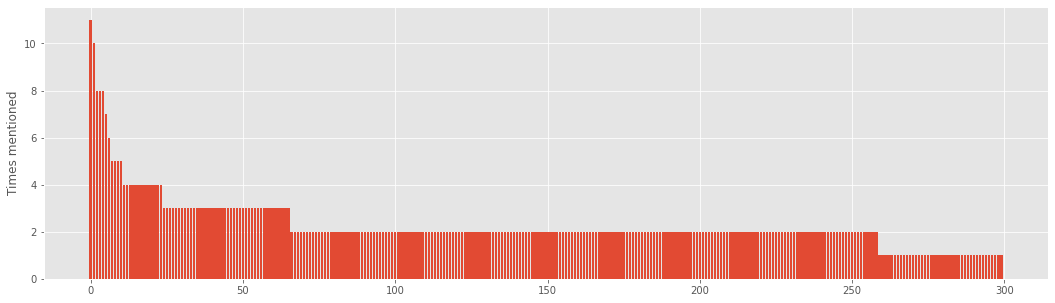

In [8]:
auth_counter = Counter(author_ids)
frequent_names, frequent_counts = zip(*auth_counter.most_common(300))

fig, ax = plt.subplots(figsize=(18,5))
plt.bar(np.arange(len(frequent_names)), frequent_counts, align='center')
plt.ylabel('Times mentioned')
plt.show()

<br>Let's also print the keyword occurences and check which keywords were the most popular ones.<br>

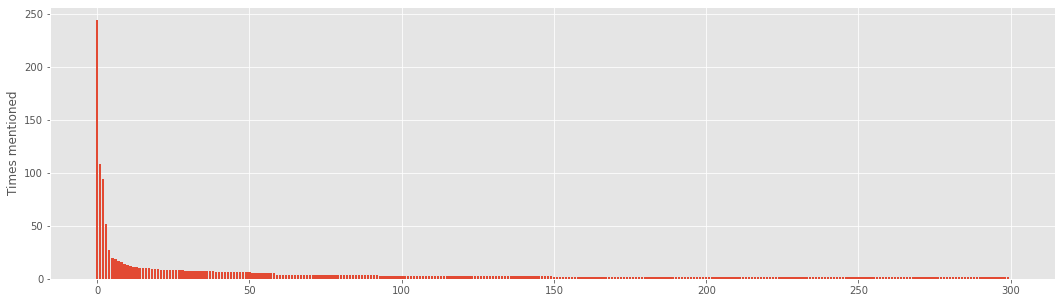

In [9]:
keyword_counter = Counter(keywords)
frequent_keywords, frequent_wordcounts = zip(*keyword_counter.most_common(300))

fig, ax = plt.subplots(figsize=(18,5))
plt.bar(np.arange(len(frequent_keywords)), frequent_wordcounts, align='center')
plt.ylabel('Times mentioned')
plt.show()

In [10]:
print("Most popular keywors:\n")
for i in range(50):
    print("{}. {}".format(i+1, frequent_keywords[i]))

Most popular keywors:

1. climate change
2. climate change mitigation
3. mitigation
4. adaptation
5. agriculture
6. carbon sequestration
7. climate policy
8. renewable energy
9. sustainability
10. greenhouse gas emissions
11. bioenergy
12. redd+
13. food security
14. paris agreement
15. biomass
16. sustainable development
17. emissions
18. greenhouse gas
19. co2 emissions
20. energy efficiency
21. governance
22. climate change adaptation
23. carbon footprint
24. life cycle assessment
25. climate mitigation
26. resilience
27. vulnerability
28. carbon
29. co-benefits
30. energy consumption
31. policy
32. scenario analysis
33. land use
34. soil organic carbon
35. cities
36. carbon pricing
37. environment
38. health
39. uncertainty
40. forest management
41. electric vehicles
42. carbon stock
43. mitigation strategies
44. willingness to pay
45. ghg emissions
46. planning
47. synergy
48. greenhouse gases
49. global warming
50. china


### Construct graph

5. Provide in a table the global attributes of this graph in terms of number of nodes,
edges, largest component, average degree centrality, global clustering coefficient,
diameter, average path length.

In [11]:
import networkx as nx

In [26]:
publication_participants = data['Author(s) ID'].values.tolist()
publication_participants = list(filter(None, publication_participants))

graph = nx.Graph()

#TODO: figure something less spaghetti
for i in range(len(publication_participants)):
    if len(publication_participants[i]) > 1:
        for j in range(len(publication_participants[i])):
            for k in range(len(publication_participants[i])):
                if(publication_participants[i][j] != None  and publication_participants[i][k] != None):
                    graph.add_node(publication_participants[i][k])
                    if (k+j) < len(publication_participants[i]):
                        graph.add_edge(publication_participants[i][j], publication_participants[i][k+j])
                        

Total number of nodes: 2823
Total number of edges: 15080
Largest connected component: TODO
Global clustering coefficient: 0.9544
Graph diameter: 2
Average path length: 1.9969


In [32]:
print("Total number of nodes: " + str(len(graph.nodes)))
print("Total number of edges: " + str(len(graph.edges)))

nx.info(graph)
print("Largest connected component: TODO")



print("Global clustering coefficient: " + str(round(nx.average_clustering(graph), 4))) # average clustering coefficient
print("Graph diameter: " + str(nx.diameter(graph)))
print("Average path length: " + str(round(nx.average_shortest_path_length(graph), 4))) #average path length

Total number of nodes: 2823
Total number of edges: 15080
Largest connected component: TODO
Global clustering coefficient: 0.9544
Graph diameter: 2
Average path length: 1.9969


In [27]:
#Average degree centrality
res = 0
dict_degree_centrality = nx.degree_centrality(graph)

for value in dict_degree_centrality.values():
    res += value
    
avg_degree_cent = res / len(dict_degree_centrality)

print("Average degree centrality: " + str(round(avg_degree_cent, 4)))

Average degree centrality: 0.0038


Table of global atributes 

| Atribute | | Value |
| :-- | --- | :-: |
| Number of nodes |  | 2823 |
| Number of edges |  | 15080 |
| Largest component |  | TODO |
| Average degree centrality |  | 0.0038 |
| Global clustering coefficient |  | 0.9544 |
| Graph diameter |  | 2.000 |
| Average path length |  | 1.997 |

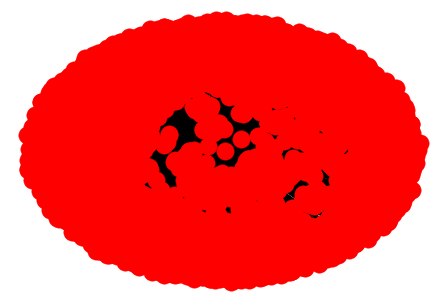

In [31]:
#heitti errorin että vaatii scipy:n "pip install scipy"
nx.draw(graph, node_color="red")


plt.show()


6. Using the concept of Erdo-number, identify the author who has got the largest number
of collaborators (co-authored the papers) and assume this author will be assigned
Erdos number 0 and direct co-authors will be assigned Erdos number 1, while other
authors who co-authors with the first collaborators and not with that of Erdos number
0, will be assigned Erdos number 2, etc.. Draw the distribution of this new Erdos
number in terms of number authors that fall in each Erdos number category.


7. Visualize the graph of authors with Erdös number 1 and 2.
